In [48]:
import pandas as pd
import plotly.graph_objs as go
import plotly.io as pio

# 데이터 불러오기
campaign_master = pd.read_csv("campaign_master.csv")
class_master = pd.read_csv("class_master.csv")
customer_master = pd.read_csv("customer_master.csv")
use_log = pd.read_csv("use_log.csv")

# start_date를 datetime 형식으로 변환
customer_master['start_date'] = pd.to_datetime(customer_master['start_date'])

# 월별 가입 회원 수 계산
customer_master['start_month'] = customer_master['start_date'].dt.to_period('M')
monthly_new_members = customer_master.groupby('start_month').size()

# 월별 총 회원 수 계산
total_members_per_month = customer_master.groupby('start_month')['customer_id'].nunique()

# 다음 달까지 이용한 회원 수 계산
customer_master['next_month'] = customer_master['start_date'] + pd.DateOffset(months=1)
customer_master['next_month'] = customer_master['next_month'].dt.to_period('M')
next_month_active_members = customer_master.groupby('next_month')['customer_id'].nunique()

# 회원 유지율 계산
retention_rate = (next_month_active_members / total_members_per_month) * 100

# 월별 가입 회원 수와 회원 유지율 시각화
fig = go.Figure()

# 월별 가입 회원 수를 선 그래프로 추가
fig.add_trace(go.Scatter(x=monthly_new_members.index.astype(str), y=monthly_new_members.values,
                         mode='lines+markers', name='월별 가입 회원 수', yaxis='y1'))

# 회원 유지율을 선 그래프로 추가
fig.add_trace(go.Scatter(x=retention_rate.index.astype(str), y=retention_rate.values,
                         mode='lines+markers', name='회원 유지율(%)', yaxis='y2'))

# 그래프 레이아웃 설정
fig.update_layout(title='월별 가입 회원 수 및 회원 유지율',
                  xaxis=dict(title='월'),
                  yaxis=dict(title='가입 회원 수', side='left', showgrid=False),
                  yaxis2=dict(title='유지율(%)', side='right', overlaying='y', showgrid=False))

# 그래프 출력
pio.show(fig)


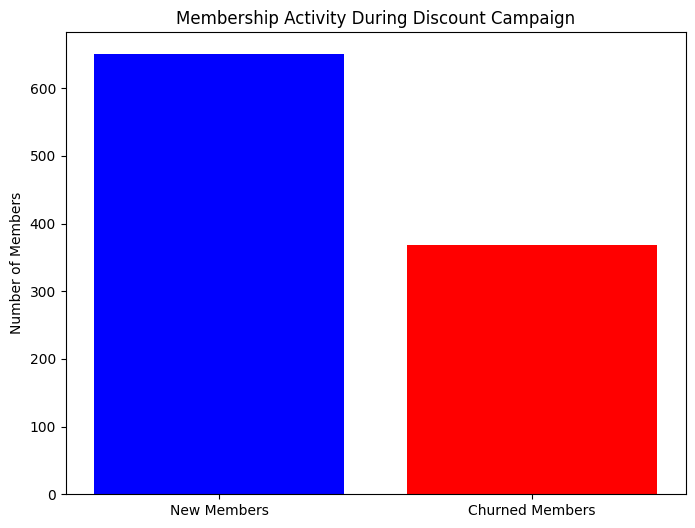

이벤트 기간 동안의 회원 가입 수: 650
이벤트 기간 동안의 이탈률: 56.61538461538461 %


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# customer_master 데이터 불러오기
customer_master = pd.read_csv("customer_master.csv")

# 행사 데이터 불러오기
campaign_master = pd.read_csv("campaign_master.csv")

# "0_입회비반액할인" 이벤트의 campaign_id 가져오기
discount_campaign_id = campaign_master[campaign_master['campaign_name'] == '0_입회비반액할인']['campaign_id'].values[0]

# 이벤트 기간 동안의 회원 가입 수 확인
joined_during_event = customer_master[customer_master['campaign_id'] == discount_campaign_id]
num_new_members = joined_during_event.shape[0]

# 이벤트 기간 동안의 이탈한 회원 수 계산
left_during_event = joined_during_event[joined_during_event['is_deleted'] == 1]
num_left_during_event = left_during_event.shape[0]

# 이벤트 기간 동안의 이탈한 회원 수와 전체 회원 수를 사용하여 이탈률 계산
churn_rate = (num_left_during_event / num_new_members) * 100

# 막대 그래프로 시각화
plt.figure(figsize=(8, 6))
plt.bar(['New Members', 'Churned Members'], [num_new_members, num_left_during_event], color=['blue', 'red'])
plt.title('Membership Activity During Discount Campaign')
plt.ylabel('Number of Members')
plt.show()

print("이벤트 기간 동안의 회원 가입 수:", num_new_members)
print("이벤트 기간 동안의 이탈률:", churn_rate, "%")


In [6]:
pip install matplotlib

You should consider upgrading via the 'c:\Users\shinpardon\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


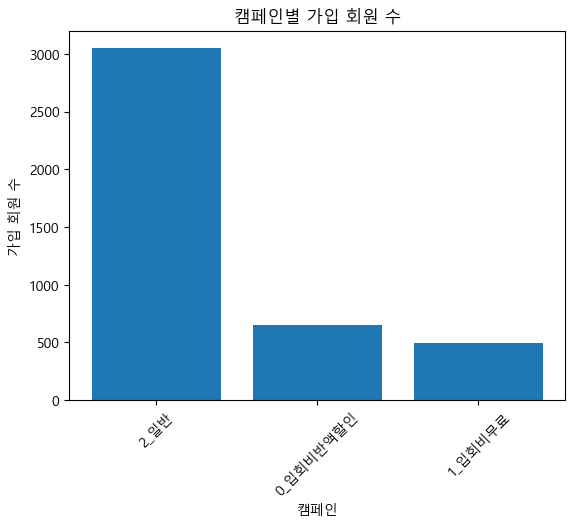

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 데이터 불러오기
customer_master = pd.read_csv("customer_master.csv")
campaign_master = pd.read_csv("campaign_master.csv")

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용하고자 하는 한글 폰트 경로로 변경
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# start_date를 datetime 형식으로 변환
customer_master['start_date'] = pd.to_datetime(customer_master['start_date'])

# 캠페인별 가입 회원 수 계산
campaign_member_counts = customer_master.groupby('campaign_id')['customer_id'].count()

# 캠페인 이름 설정
campaign_member_counts.index = campaign_master.set_index('campaign_id').loc[campaign_member_counts.index]['campaign_name']

# 캠페인별 가입 회원 수 시각화
plt.bar(campaign_member_counts.index, campaign_member_counts.values)
plt.title('캠페인별 가입 회원 수')
plt.xlabel('캠페인')
plt.ylabel('가입 회원 수')
plt.xticks(rotation=45)
plt.show()